-18*exp(2*t)/7 + 4*exp(-5*t)/7
27*exp(2*t)/7 + 8*exp(-5*t)/7


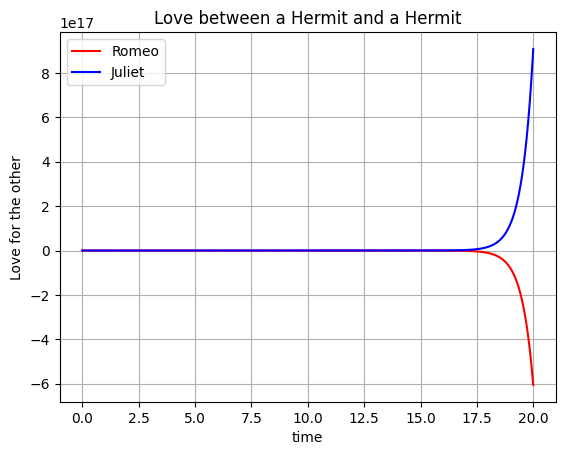

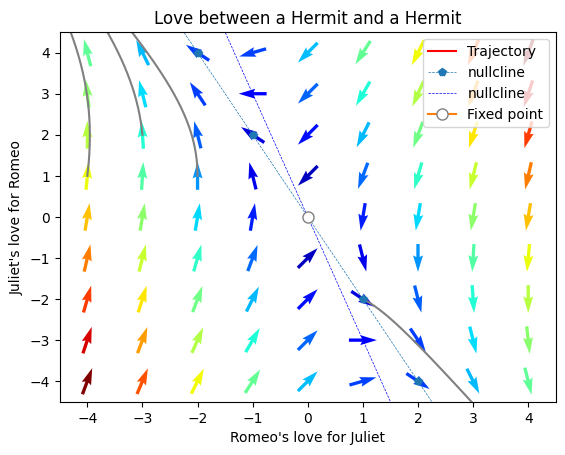

In [ ]:
 from sympy import Symbol, Function, Derivative, Eq, dsolve, solve

a,b,c,d,r0,j0 = [-1,-2,-6,-2,-2,5]
#Giai he phuong trinh
t = Symbol('t')
r = Function('r')(t)
j = Function('j')(t)
deq1 = Eq(Derivative(r), a*r + b*j)
deq2 = Eq (Derivative(j), c*r + d*j)
system = (deq1, deq2)
s = dsolve(system)
eq1 = s[0].rhs.subs(t,0) - r0
eq2 = s[1].rhs.subs(t,0) - j0
constants = solve([eq1, eq2])
r = s[0].subs(constants)
j = s[1].subs(constants)
r = r.rhs
j = j.rhs
print(r)
print(j)


from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pylab as p

def love(X, t = 0):
    dR = a*X[0]+b*X[1]
    dJ = c*X[0]+d*X[1]
    return [dR ,dJ]
#Ten do thi tuong ung voi cac tham so a, b, c, d
def romanticStyle(a,b):
    if(a>0 and b>0):
        return "Eager Beaver"
    if(a>0 and b<0):
        return "Narcissistic Nerd"
    if(a<0 and b>0):
        return "Cautious Lover"
    if(a<0 and b<0):
        return "Hermit"
    else:
        return "Undefine"

t = np.linspace(0,20,10000) #gioi han khoang time
InitC = [r0,j0]
X = integrate.odeint(love, InitC, t)
Romeo, Juliet = X.T
f1 = p.figure()
p.plot(t, Romeo, 'r-', label='Romeo')
p.plot(t, Juliet  , 'b-', label='Juliet')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('Love for the other')
p.title('Love between a '+ romanticStyle(a,b)+ ' and a '+ romanticStyle(c,d))
f2 = p.figure()

#---------------

X0 = [r0,j0]                             # diem bat dau
X = integrate.odeint( love, X0, t)         
p.plot( X[:,0], X[:,1], color="red", label = "Trajectory") #label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

# sub trajectories
X0 = [-2,1]                             # diem bat dau
X = integrate.odeint( love, X0, t)         
p.plot( X[:,0], X[:,1], color="grey")

X0 = [1,-2]                             # diem bat dau
X = integrate.odeint( love, X0, t)         
p.plot( X[:,0], X[:,1], color="grey")

X0 = [-3,2]                             # diem bat dau
X = integrate.odeint( love, X0, t)         
p.plot( X[:,0], X[:,1], color="grey")

X0 = [-4,1]                             # diem bat dau
X = integrate.odeint( love, X0, t)         
p.plot( X[:,0], X[:,1], color="grey")
    
#-----------------------------

ymax = 4                      
xmax = 4
nb_points = 9
ymin = -4
xmin = -4
x = np.linspace(xmin, xmax, nb_points)
y = np.linspace(ymin, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # tao grid
DX1, DY1 = love([X1, Y1])                      # 
M = (np.hypot(DX1, DY1))                           # ti le gia tang
M[ M == 0] = 1.                                 # Tranh chia cho 0
DX1 /= M                                        # mui ten
DY1 /= M


#-------------------------------------------------------

p.title('Love between a '+ romanticStyle(a,b)+ ' and a '+ romanticStyle(c,d))
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Romeo\'s love for Juliet')
p.ylabel('Juliet\'s love for Romeo')
if(a != 0):
    p.plot(x,-b*y/a, 'p--', lw=0.5, label = "nullcline")
if(d!= 0):
    p.plot(x,-c*y/d, 'b--', lw=0.5, label='nullcline')
p.plot(0, 0, marker="o", markersize=8, markeredgecolor="grey", markerfacecolor="white", label ="Fixed point")
#p.grid()
p.legend()
p.xlim(-4.5, 4.5)
p.ylim(-4.5, 4.5)






# 